In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [84]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


About the dataset
pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower Survival 0 = No, 1 = Yes embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton sibsp # of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic

In [124]:
# number of rows and columns
df.shape

(891, 11)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
#check number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [88]:
#drop the Cabin column
df = df.drop(columns='Cabin', axis=1)

#replace missing values in Age column with mean age value

df['Age'] = df['Age'].fillna(df['Age'].mean())


#replacing missing values in Embarked column with mode value
print(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0],inplace= False)
df.head()


S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [89]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [90]:
#statistical measures of data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
#number of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Visualization
Helps to see effect of features on target variable

In [92]:
import seaborn as sns
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

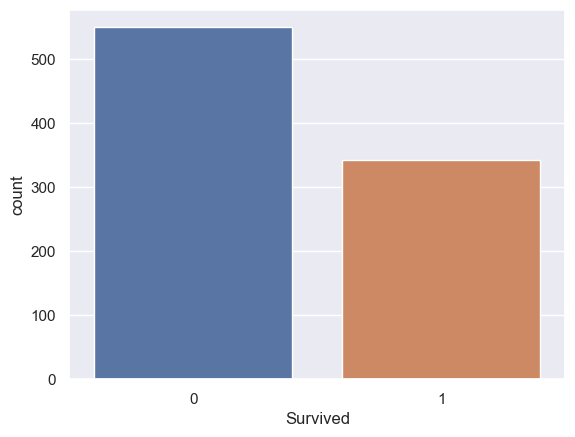

In [93]:
#count plot for survived column
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

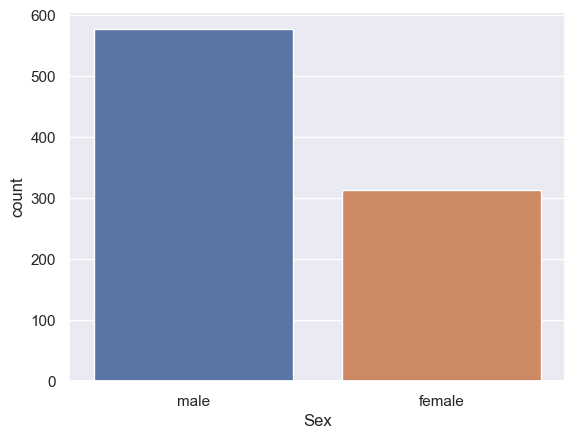

In [94]:
sns.countplot(x= 'Sex',data=df)

In [95]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

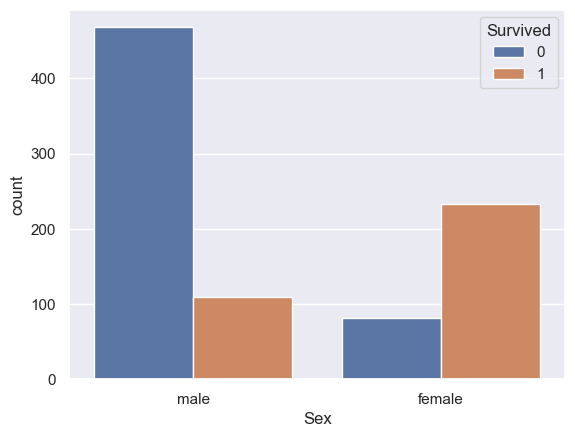

In [96]:
#effect of Sex column on survived column
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

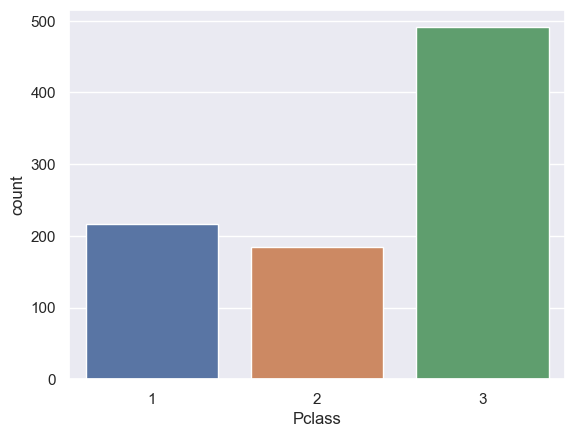

In [97]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

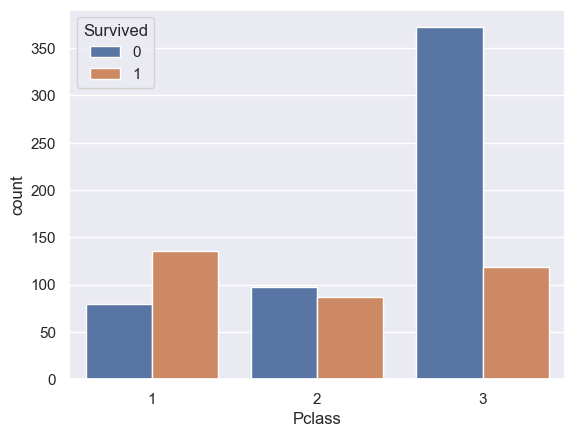

In [98]:
#effect of Pclass parameter on Survived(target variable)
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Parch', ylabel='count'>

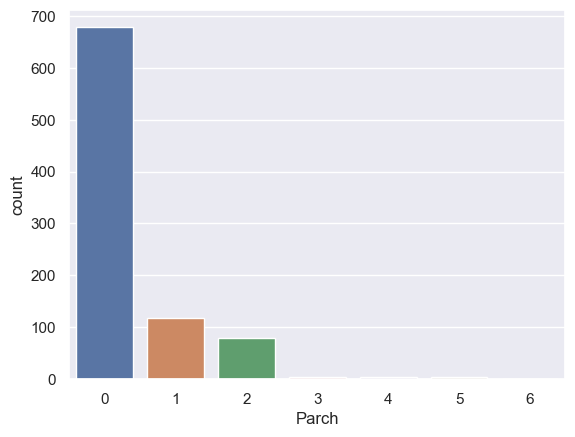

In [128]:
#effect of parch column on target variable
sns.countplot(x='Parch',data=df)

<Axes: xlabel='Parch', ylabel='count'>

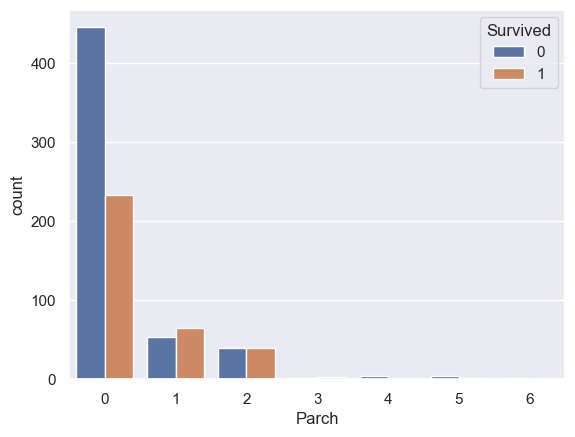

In [127]:
sns.countplot(x='Parch',hue='Survived',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

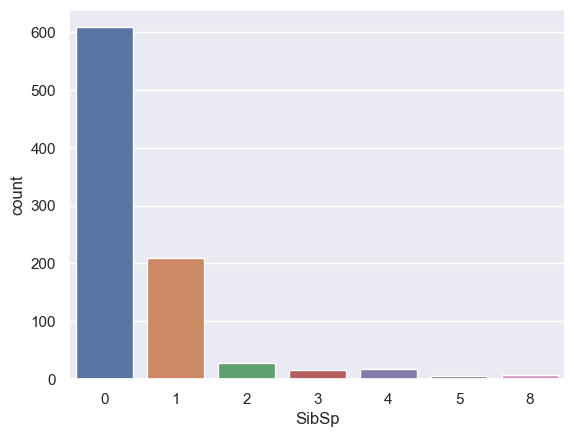

In [99]:
#effect of Sibsp column on target variable
sns.countplot(x='SibSp',data=df)


<Axes: xlabel='SibSp', ylabel='count'>

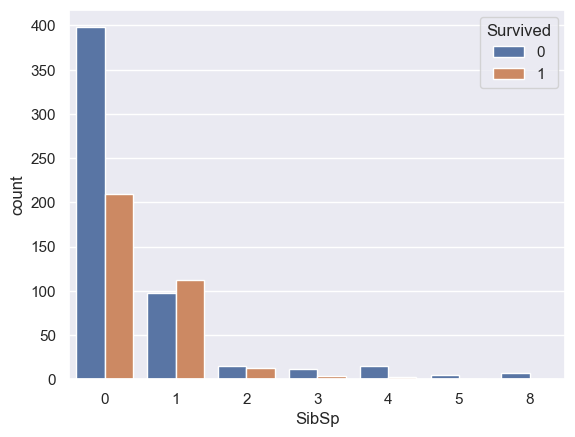

In [100]:
sns.countplot(x='SibSp',hue='Survived',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

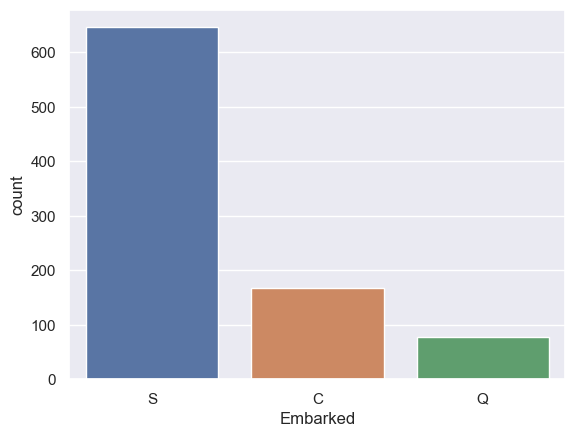

In [101]:
#effect of Embarked column on Target variable
sns.countplot(x='Embarked',data=df)


<Axes: xlabel='Embarked', ylabel='count'>

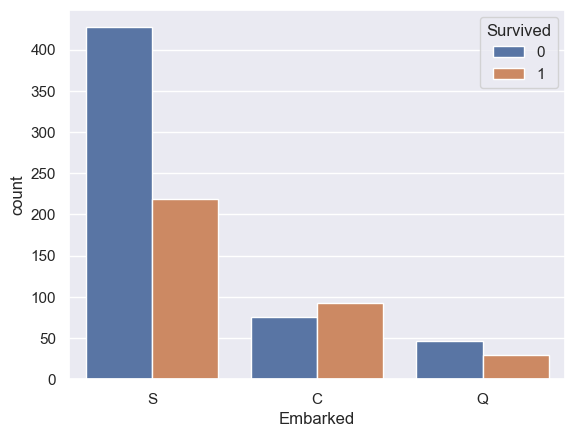

In [102]:
sns.countplot(x='Embarked',hue='Survived',data=df)

Encoding the Categorical Columns

In [103]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df["Sex_n"] = le_sex.fit_transform(df['Sex'])
df["Embarked_n"] = le_sex.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_n,Embarked_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2


In [104]:
df = df.drop(['Sex','Embarked'],axis = 'columns')
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_n,Embarked_n
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,2


Separating features and Target

In [105]:
target = df.Survived

In [106]:
inputs = df[['Pclass','Sex_n','Age','SibSp','Parch','Fare','Embarked_n']]

In [107]:
inputs.head()

,Pclass,Sex_n,Age,SibSp,Parch,Fare,Embarked_n
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


Splitting data into Training and Testing

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

Model Training

1.Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(inputs,target)

LogisticRegression()

2.Decision Tree

In [110]:
from sklearn import tree
Dt_model = tree.DecisionTreeClassifier()
Dt_model.fit(inputs,target)

DecisionTreeClassifier()

3.Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()
Rf_model.fit(inputs,target)

RandomForestClassifier()

In [112]:
from sklearn.svm import SVC
svm_model= SVC()
svm_model.fit(inputs,target)

SVC()

Accuracy of Models

In [113]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [114]:
from sklearn.model_selection import KFold
kf= KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [115]:
score_lr= []
score_dt = []
score_rf =[]
score_svm=[]
for train_index, test_index in kf.split(inputs):
   x_train,x_test= inputs.iloc[train_index],inputs.iloc[test_index]
   y_train,y_test= target.iloc[train_index],target.iloc[test_index]
   score_lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
   score_dt.append(get_score(tree.DecisionTreeClassifier(),x_train,x_test,y_train,y_test))
   score_rf.append(get_score(RandomForestClassifier(n_estimators=40),x_train,x_test,y_train,y_test))
   score_svm.append(get_score(SVC(C=30),x_train,x_test,y_train,y_test))
   #print the average scores for each algorithm and standard deviation of all 5 folds

C:\Users\91898\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91898\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [116]:
score_lr


[0.7877094972067039,
 0.7808988764044944,
 0.7752808988764045,
 0.7528089887640449,
 0.8370786516853933]

In [117]:
score_dt

[0.7486033519553073,
 0.7696629213483146,
 0.8089887640449438,
 0.7640449438202247,
 0.7808988764044944]

In [118]:
score_rf

[0.7821229050279329,
 0.8033707865168539,
 0.8595505617977528,
 0.7752808988764045,
 0.8314606741573034]

In [119]:
score_svm

[0.6480446927374302,
 0.7415730337078652,
 0.7359550561797753,
 0.7415730337078652,
 0.8370786516853933]

In [120]:
#Average accuracy of Logistic Regression model
score_lr= np.array(score_lr)
print("LogisticRegression Model Accuracy:",np.mean(score_lr))


LogisticRegression Model Accuracy: 0.7867553825874081


In [121]:
#Average accuracy of Decision Tree model
score_dt= np.array(score_dt)
print("Decision Model Accuracy:",np.mean(score_dt))


Decision Model Accuracy: 0.7744397715146569


In [122]:
#Average accuracy of Randon forest classifier model
score_rf= np.array(score_rf)
print("Random forest Model Accuracy:",np.mean(score_rf))


Random forest Model Accuracy: 0.8103571652752495


In [123]:
#Average accuracy of SVM model
score_svm= np.array(score_svm)
print("SVM Model Accuracy:",np.mean(score_svm))


SVM Model Accuracy: 0.7408448936036658


We can see that Random forest classifier and Logistic regression are more efficient models